<a href="https://www.kaggle.com/code/hikmatullahmohammadi/mohs-hardness-prediction-eda?scriptVersionId=151559428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 20px'>
    Mohs Hardness | Feature Engineering | EDA
</h1>

<div style='background: black;color: white;border-radius: 10px; padding: 20px'>
    <h1>Easy Navigation</h1>
    <ul>
        <li><h3><a href='#0'>0- Intro</a></h3></li>
        <li><h3><a href='#1'>1- Data preprocessing</a></h3></li>
        <li>
            <h3><a href='#2'>2- Data exploration and visualization</a></h3>
            <ul>
                <li><h4><a href='#2-1'>2.1-  Exploratory Data Analysis (EDA)</a></h4></li>
            </ul>
        </li>
        <li>
            <h3><a href='#3'>3- Modeling</a></h3>
        </li>
        <li>
            <h3><a href='#4'>4- Prediction and submission</a></h3>
        </li>
    </ul>
</div>

<a id='0'></a>
<h2 style='text-align: center;background: black;color: white; padding: 15px;border: 2px solid'>
    0- Intro</h2>

<div style='background: black;color: white;border-radius: 10px; padding: 20px'>
    <h1  style='color: white'>Dataset Description</h1>
    <p style='color: white'>Hardness, or the quantitative value of resistance to permanent or plastic deformation, plays a very crucial role in materials design in many applications, such as ceramic coatings and abrasives. Hardness testing is an especially useful method as it is non-destructive and simple to implement to gauge the plastic properties of a material. In this study, I proposed a machine, or statistical, learning approach to predict hardness in naturally occurring materials, which integrates atomic and electronic features from composition directly across a wide variety of mineral compositions and crystal systems. First, atomic and electronic features from the composition, such as van der Waals and covalent radii as well as the number of valence electrons, were extracted from the composition.
    </p>
    <p style='color: white'>
    In this study, the author trained a set of classifiers to understand whether compositional features can be used to predict the Mohs hardness of minerals of different chemical spaces, crystal structures, and crystal classes. The dataset for training and testing the classification models used in this study originated from experimental Mohs hardness data, their crystal classes, and chemical compositions of naturally occurring minerals reported in the Physical and Optical Properties of Minerals CRC Handbook of Chemistry and Physics and the American Mineralogist Crystal Structure Database. The database is composed of 369 uniquely named minerals. Due to the presence of multiple composition combinations for minerals referred to by the same name, the first step was to perform compositional permutations on these minerals. This produced a database of 622 minerals of unique compositions, comprising 210 monoclinic, 96 rhombohedral, 89 hexagonal, 80 tetragonal, 73 cubic, 50 orthorhombic, 22 triclinic, 1 trigonal, and 1 amorphous structure. An independent dataset was compiled to validate the model performance. The validation dataset contains the composition, crystal structure, and Mohs hardness values of 51 synthetic single crystals reported in the literature. The validation dataset includes 15 monoclinic, 7 tetragonal, 7 hexagonal, 6 orthorhombic, 4 cubic, and 3 rhombohedral crystal structures.
    </p>
    <p style='color: white'>
        In this study, the author constructed a database of compositional feature descriptors that characterize naturally occurring materials obtained directly from the Physical and Optical Properties of Minerals CRC Handbook45. This comprehensive compositional-based dataset allows us to train models that are able to predict hardness across a wide variety of mineral compositions and crystal classes. Each material in both the naturally occurring mineral and artificial single crystal datasets was represented by 11 atomic descriptors. The elemental features are the number of electrons, number of valence electrons, atomic number, Pauling electronegativity of the most common oxidation state, covalent atomic radii, van der Waals radii, and ionization energy of neutral.
    </p>
</div>

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as plot
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
train_df = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv', index_col=0)
test_df = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv', index_col=0)

In [3]:
train_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
# columns
np.array(train_df.columns).reshape(-1, 1)

array([['allelectrons_Total'],
       ['density_Total'],
       ['allelectrons_Average'],
       ['val_e_Average'],
       ['atomicweight_Average'],
       ['ionenergy_Average'],
       ['el_neg_chi_Average'],
       ['R_vdw_element_Average'],
       ['R_cov_element_Average'],
       ['zaratio_Average'],
       ['density_Average'],
       ['Hardness']], dtype=object)

In [5]:
train_df.shape

(10407, 12)

<div style='background: black;color: white;border-radius: 10px; padding: 20px'>
The dataset contains <b>10407</b> observatoins (rows) and <b>12</b> features (columns)
</div>

In [6]:
# data types
train_df.dtypes

allelectrons_Total       float64
density_Total            float64
allelectrons_Average     float64
val_e_Average            float64
atomicweight_Average     float64
ionenergy_Average        float64
el_neg_chi_Average       float64
R_vdw_element_Average    float64
R_cov_element_Average    float64
zaratio_Average          float64
density_Average          float64
Hardness                 float64
dtype: object

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


<div style='background: black;color: white;border-radius: 10px; padding: 15px'>
There is not any inappropriate data types
    </div>

<a id='1'></a>
<h2 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 15px'>
    1- Data preprocessing</h2>

<h3 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 10px'>
    1.1- Handling Missing Values
</h3>

In [8]:
# missing values
train_df.isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

There is no missin values.

<a id='2'></a>
<h1 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 15px;'>
    2- Data exploration and visualization</h1>

### Summary of nummeric features

In [9]:
train_df.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


<div style='background: black;color: white;border-radius: 10px; padding: 15px'>
Bases on the chart above, we can see that the feature 'allelectrons_Total' contains some outliers which will be handled later.
</div>

In [10]:
# let's look at 'allelectrons_Total'
train_df['allelectrons_Total'].describe()

count    10407.000000
mean       128.053516
std        224.123776
min          0.000000
25%         68.000000
50%        100.000000
75%        131.000000
max      15300.000000
Name: allelectrons_Total, dtype: float64

<a id='2-1'></a>
<h3 style='text-align: center;background: black;color: white;border-radius: 15px; padding: 10px;'>
    2.1- Exploratory Data Analysis
</h3>

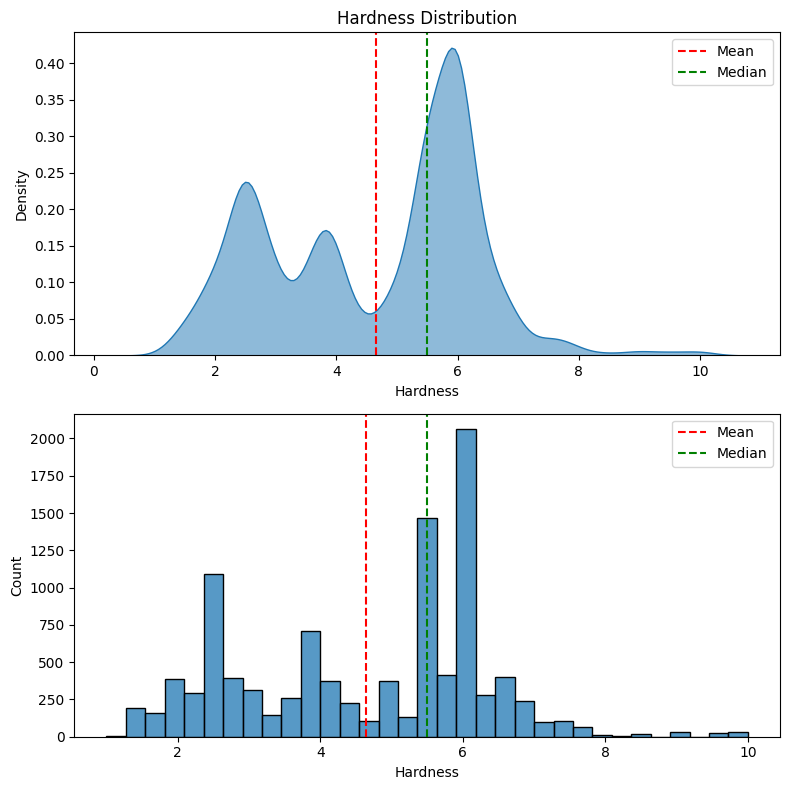

In [11]:
# Hardness distribution

# Create a subplot with two rows and one column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the distribution of Hardness using a density plot
sns.kdeplot(data=train_df['Hardness'], ax=ax1, fill=True, alpha=0.5)
ax1.axvline(x=train_df['Hardness'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(x=train_df['Hardness'].median(), color='green', linestyle='--', label='Median')
ax1.legend()
ax1.set_xlabel('Hardness')
ax1.set_ylabel('Density')
ax1.set_title('Hardness Distribution')

# Plot the histogram of Hardness
sns.histplot(data=train_df['Hardness'], ax=ax2)
ax2.axvline(x=train_df['Hardness'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(x=train_df['Hardness'].median(), color='green', linestyle='--', label='Median')
ax2.legend()
ax2.set_xlabel('Hardness')
ax2.set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

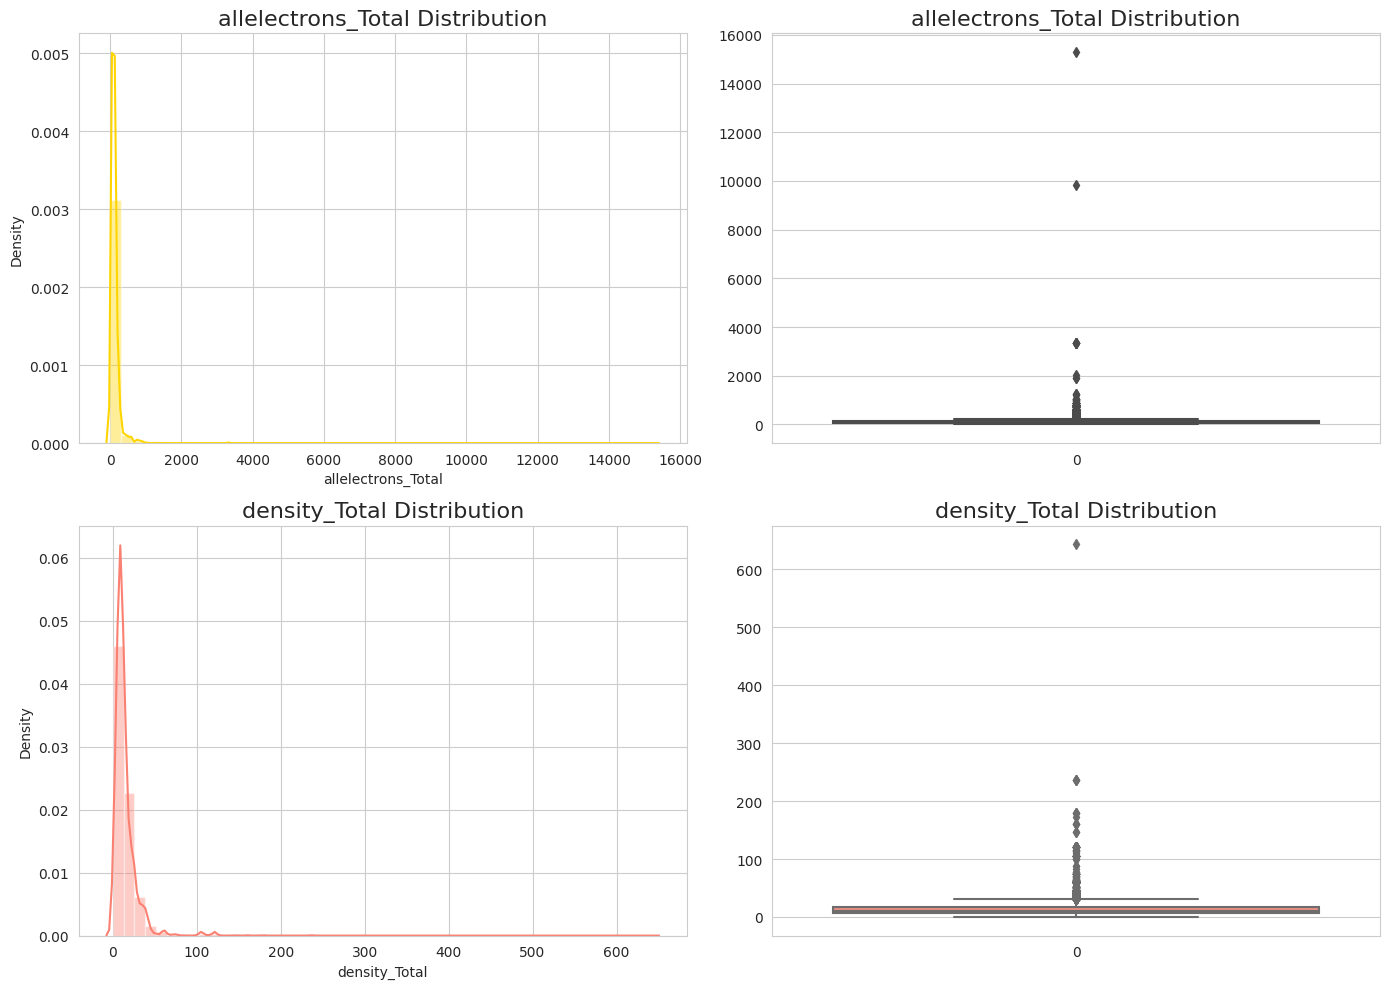

In [12]:
# PLot allelectrons_Total and density_Total distributions
f1 = 'allelectrons_Total'
f2 = 'density_Total'

plt.figure(figsize=(14,10))
sns.set_style('whitegrid')
sns.set_palette('hsv')

plt.subplot(2,2,1)
ax = sns.distplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,2)
ax = sns.boxplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.distplot(train_df[f2], color='salmon')
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,4)
ax = sns.boxplot(train_df[f2], color='salmon')
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

<div style='background: black;color: white;border-radius: 10px; padding: 10px'>
    There are some outliers in these features of which will be taken care in the following cell.
</div>

In [13]:
# Replace the values of allelectrons_Total greater than or equal to 500 by the mean value (train and test sets)
f = 'allelectrons_Total'
train_df[f].replace(train_df[f][train_df[f] >= 500].values, train_df[f].mean(), inplace=True)
test_df[f].replace(test_df[f][test_df[f] >= 500].values, test_df[f].mean(), inplace=True)

In [14]:
# Replace the values of density_Total greater than or equal to 100 by the mean value (train and test sets)
f = 'density_Total'
train_df[f].replace(train_df[f][train_df[f] >= 100].values, train_df[f].mean(), inplace=True)
test_df[f].replace(test_df[f][test_df[f] >= 100].values, test_df[f].mean(), inplace=True)

plot the above again and see the difference

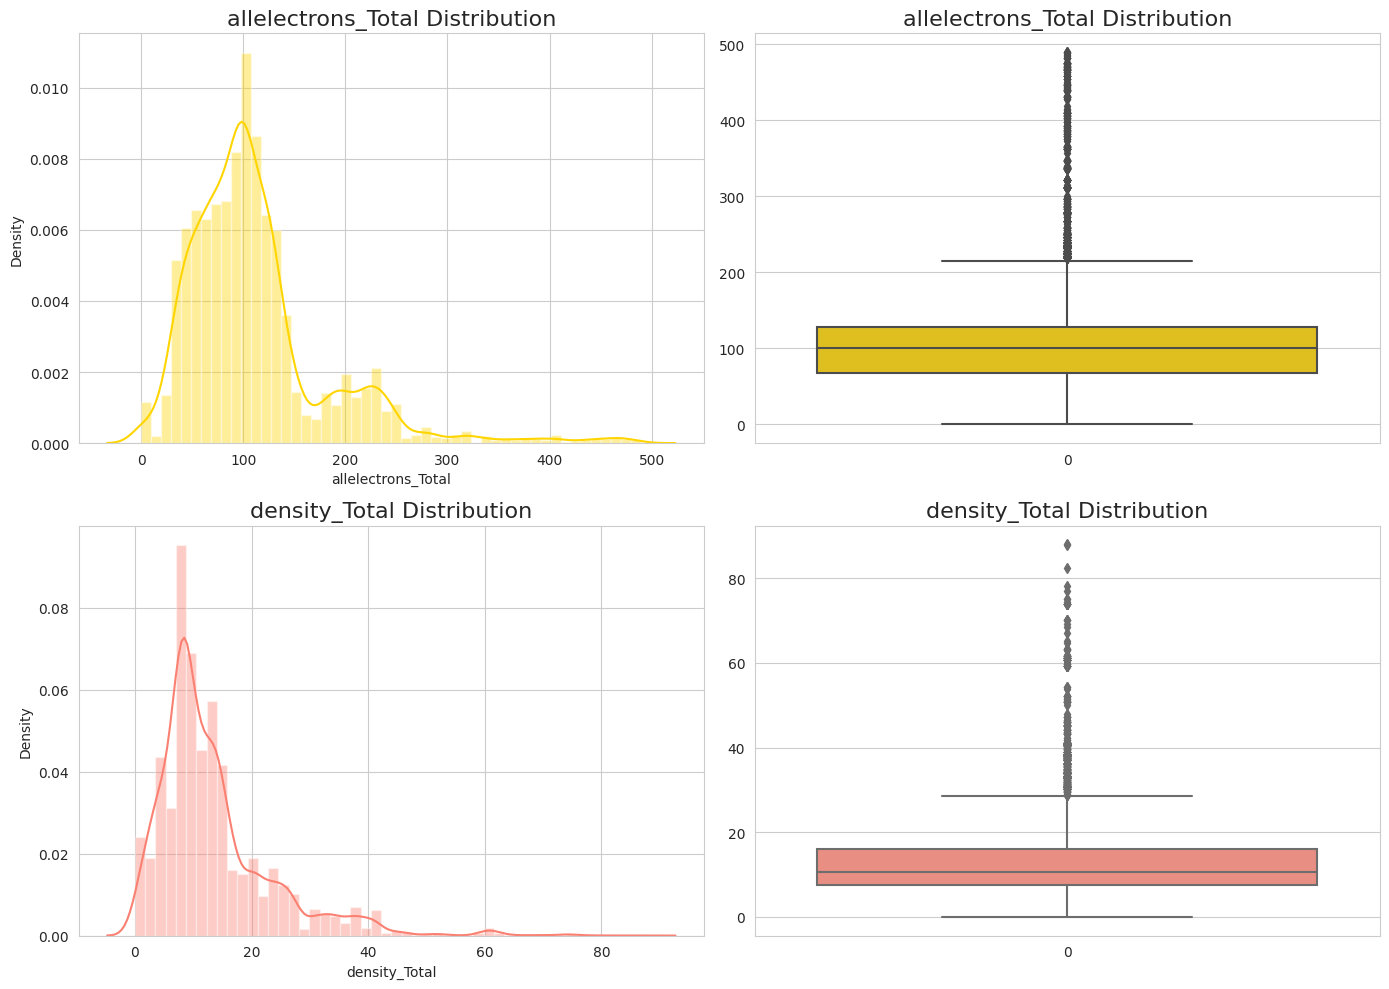

In [15]:
# PLot allelectrons_Total and density_Total distributions
f1 = 'allelectrons_Total'
f2 = 'density_Total'

plt.figure(figsize=(14,10))
sns.set_style('whitegrid')
sns.set_palette('hsv')

plt.subplot(2,2,1)
ax = sns.distplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,2)
ax = sns.boxplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.distplot(train_df[f2], color='salmon')
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,4)
ax = sns.boxplot(train_df[f2], color='salmon')
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

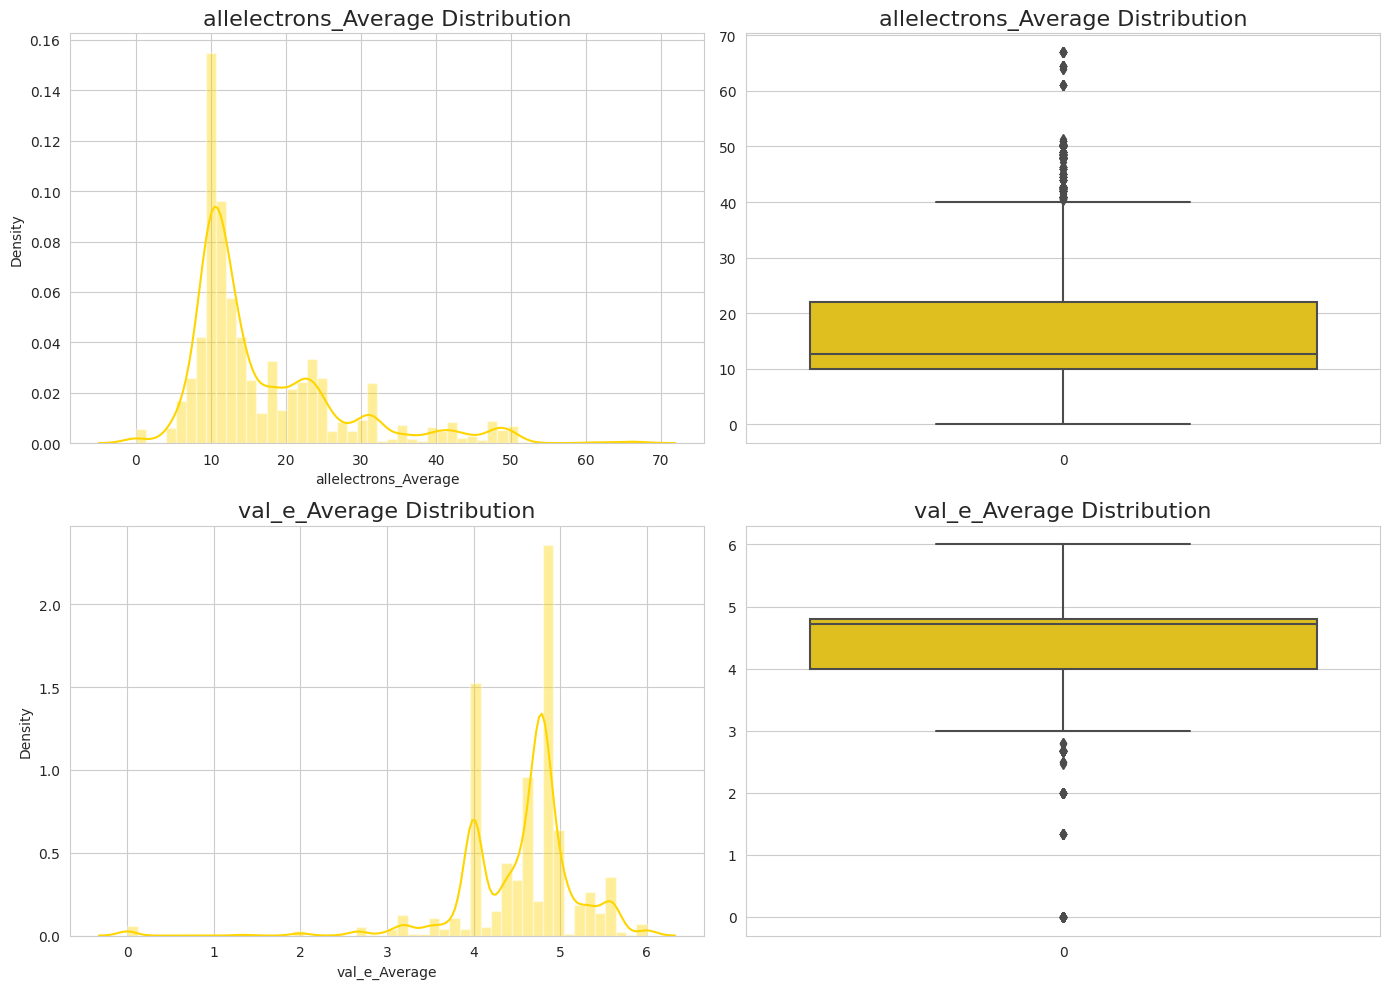

In [16]:
# PLot allelectrons_Average and val_e_Average distributions

f1 = 'allelectrons_Average'
f2 = 'val_e_Average'

plt.figure(figsize=(14,10))
sns.set_style('whitegrid')
sns.set_palette('hsv')

plt.subplot(2,2,1)
ax = sns.distplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,2)
ax = sns.boxplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.distplot(train_df[f2])
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,4)
ax = sns.boxplot(train_df[f2])
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

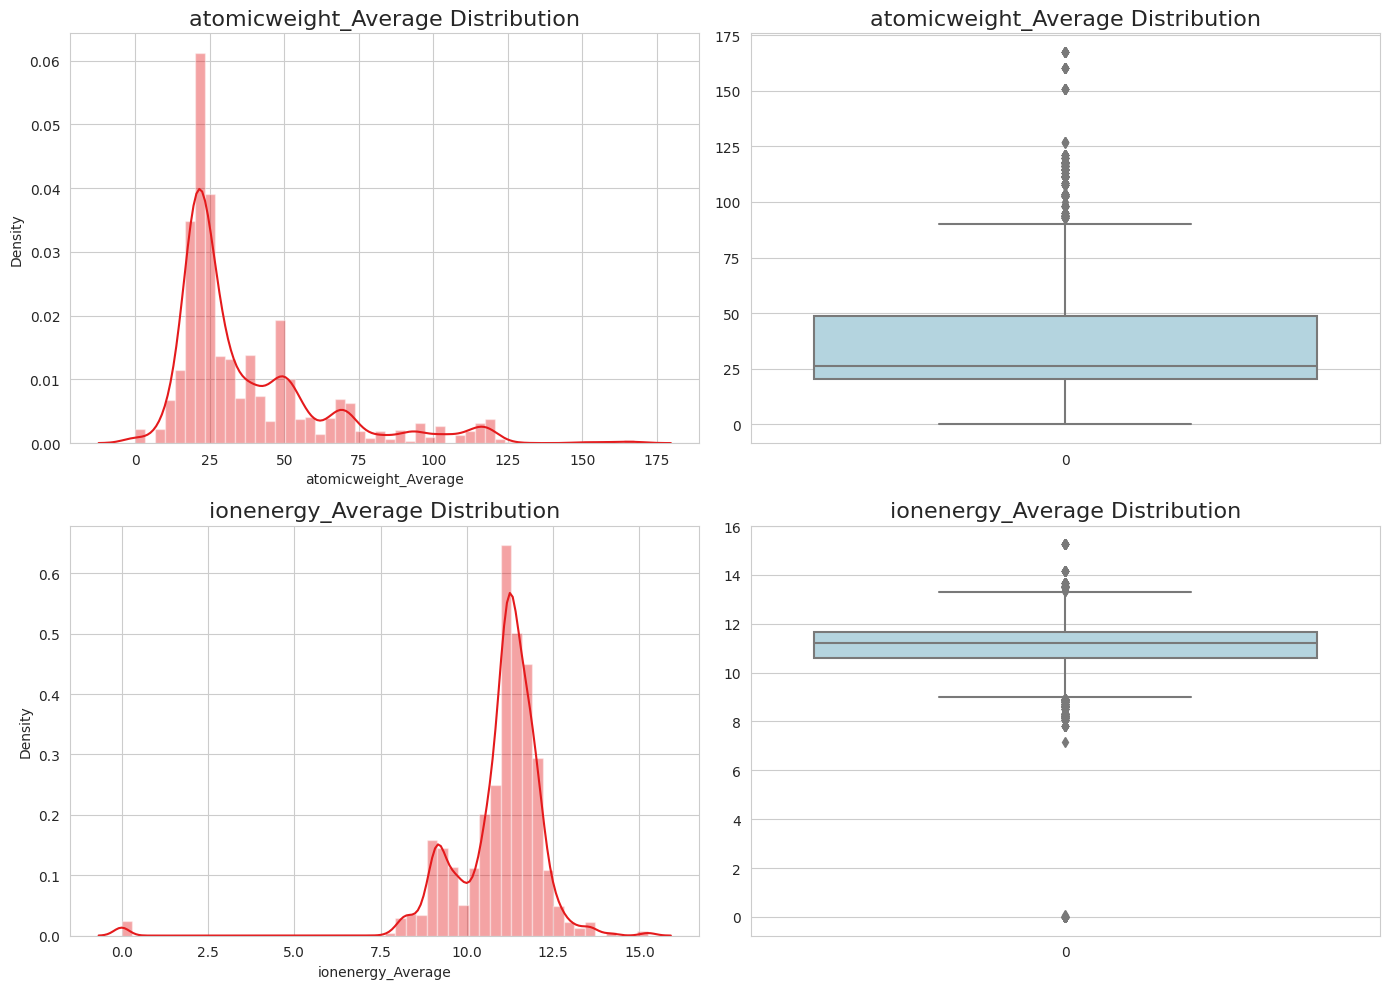

In [17]:
# PLot atomicweight_Average and ionenergy_Average distributions

f1 = 'atomicweight_Average'
f2 = 'ionenergy_Average'

plt.figure(figsize=(14,10))
sns.set_style('whitegrid')
sns.set_palette('Set1')

plt.subplot(2,2,1)
ax = sns.distplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,2)
ax = sns.boxplot(train_df[f1], color='lightblue')
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.distplot(train_df[f2])
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,4)
ax = sns.boxplot(train_df[f2], color='lightblue')
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

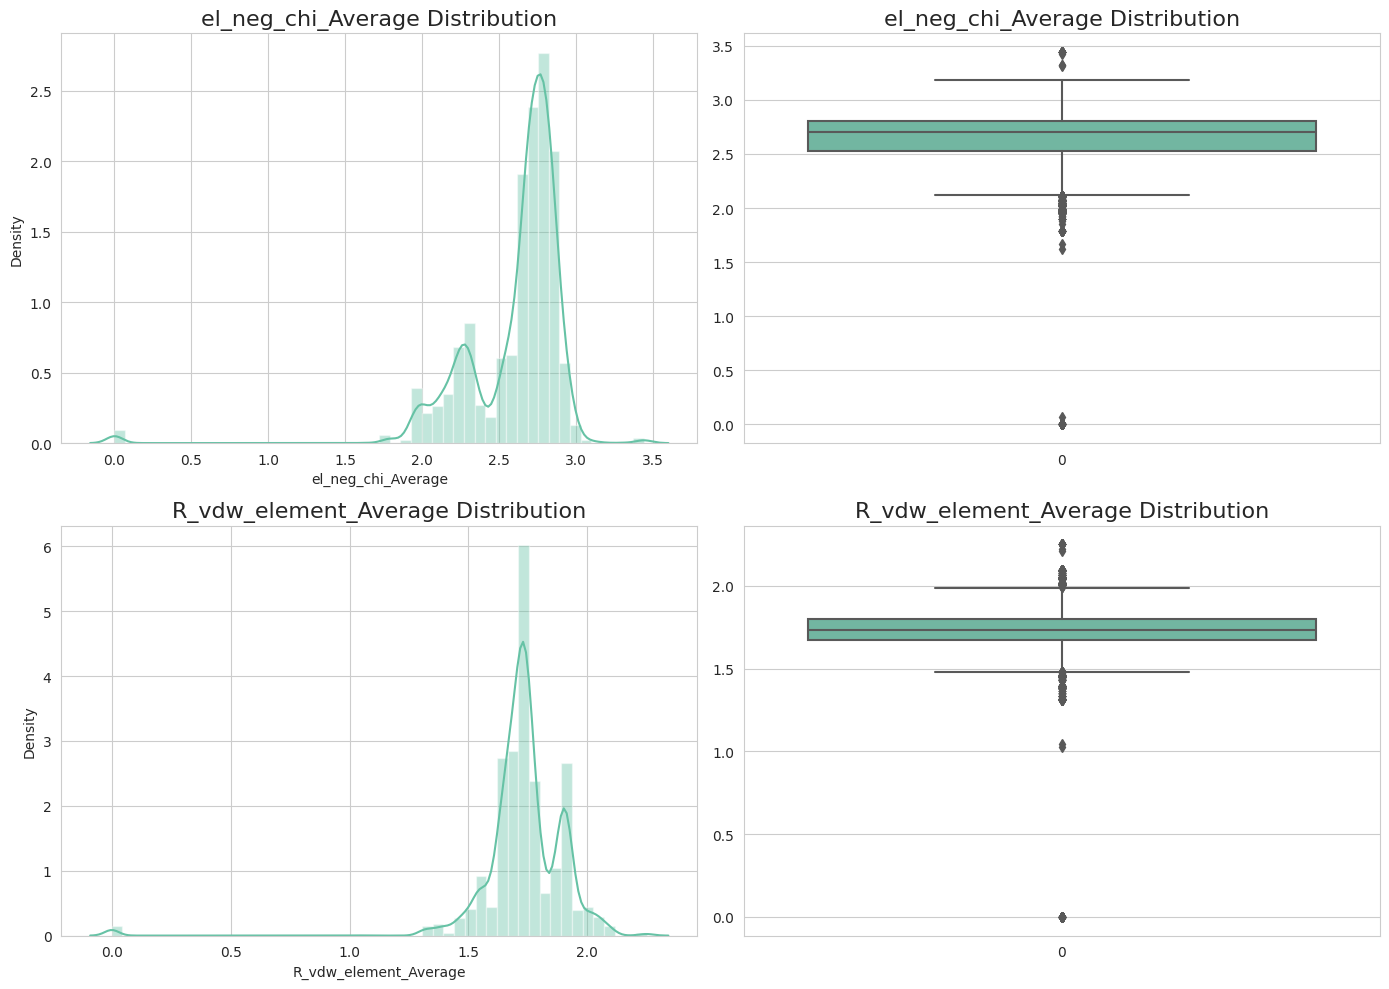

In [18]:
# PLot 'el_neg_chi_Average' and 'R_vdw_element_Average' distributions

f1 = 'el_neg_chi_Average'
f2 = 'R_vdw_element_Average'

plt.figure(figsize=(14,10))
sns.set_style('whitegrid')
sns.set_palette('Set2')

plt.subplot(2,2,1)
ax = sns.distplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,2)
ax = sns.boxplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})

plt.subplot(2,2,3)
ax = sns.distplot(train_df[f2])
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.subplot(2,2,4)
ax = sns.boxplot(train_df[f2])
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

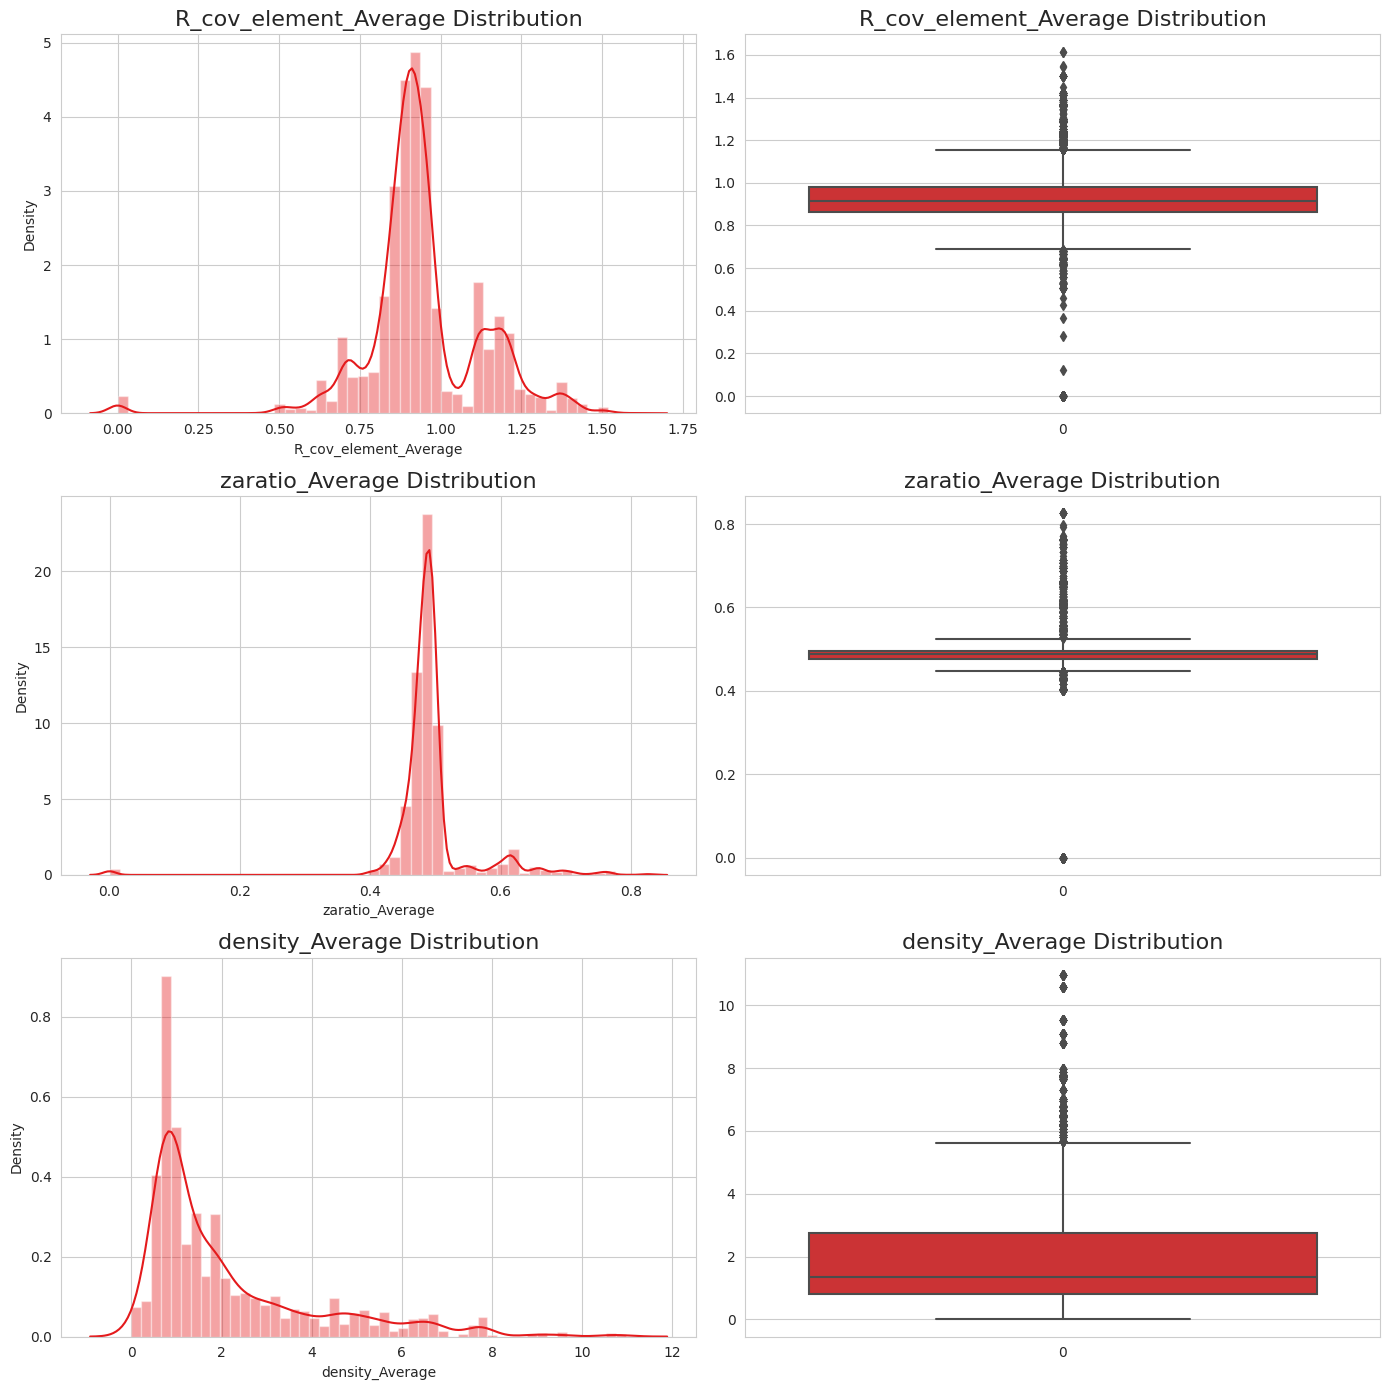

In [19]:
# PLot 'R_cov_element_Average', 'zaratio_Average', and 'density_Average' distributions

f1 = 'R_cov_element_Average'
f2 = 'zaratio_Average'
f3 = 'density_Average'

plt.figure(figsize=(14,14))
sns.set_style('whitegrid')
sns.set_palette('Set1')

plt.subplot(3,2,1)
ax = sns.distplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})
plt.subplot(3,2,2)
ax = sns.boxplot(train_df[f1])
ax.set_title(f'{f1} Distribution', fontdict={'fontsize':16})

plt.subplot(3,2,3)
ax = sns.distplot(train_df[f2])
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.subplot(3,2,4)
ax = sns.boxplot(train_df[f2])
ax.set_title(f'{f2} Distribution', fontdict={'fontsize':16})
plt.tight_layout()

plt.subplot(3,2,5)
ax = sns.distplot(train_df[f3])
ax.set_title(f'{f3} Distribution', fontdict={'fontsize':16})
plt.subplot(3,2,6)
ax = sns.boxplot(train_df[f3])
ax.set_title(f'{f3} Distribution', fontdict={'fontsize':16})
plt.tight_layout()

plt.show()

---

<Axes: >

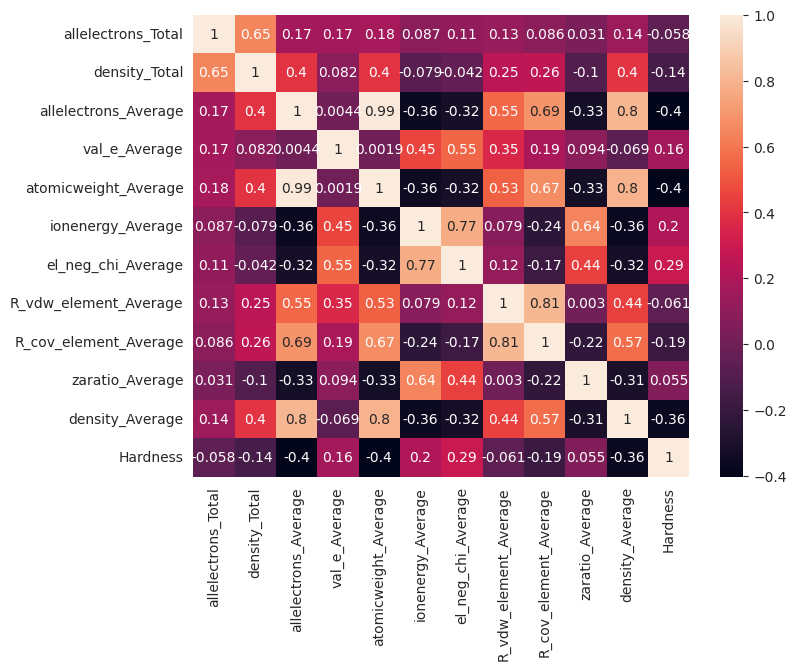

In [20]:
# heatmap of correlation between nummeric features
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True)

<h5 style='background: black;color: white;border-radius: 15px; padding: 15px'>
    - Let's see how each feature affects the target variable.
</h5>

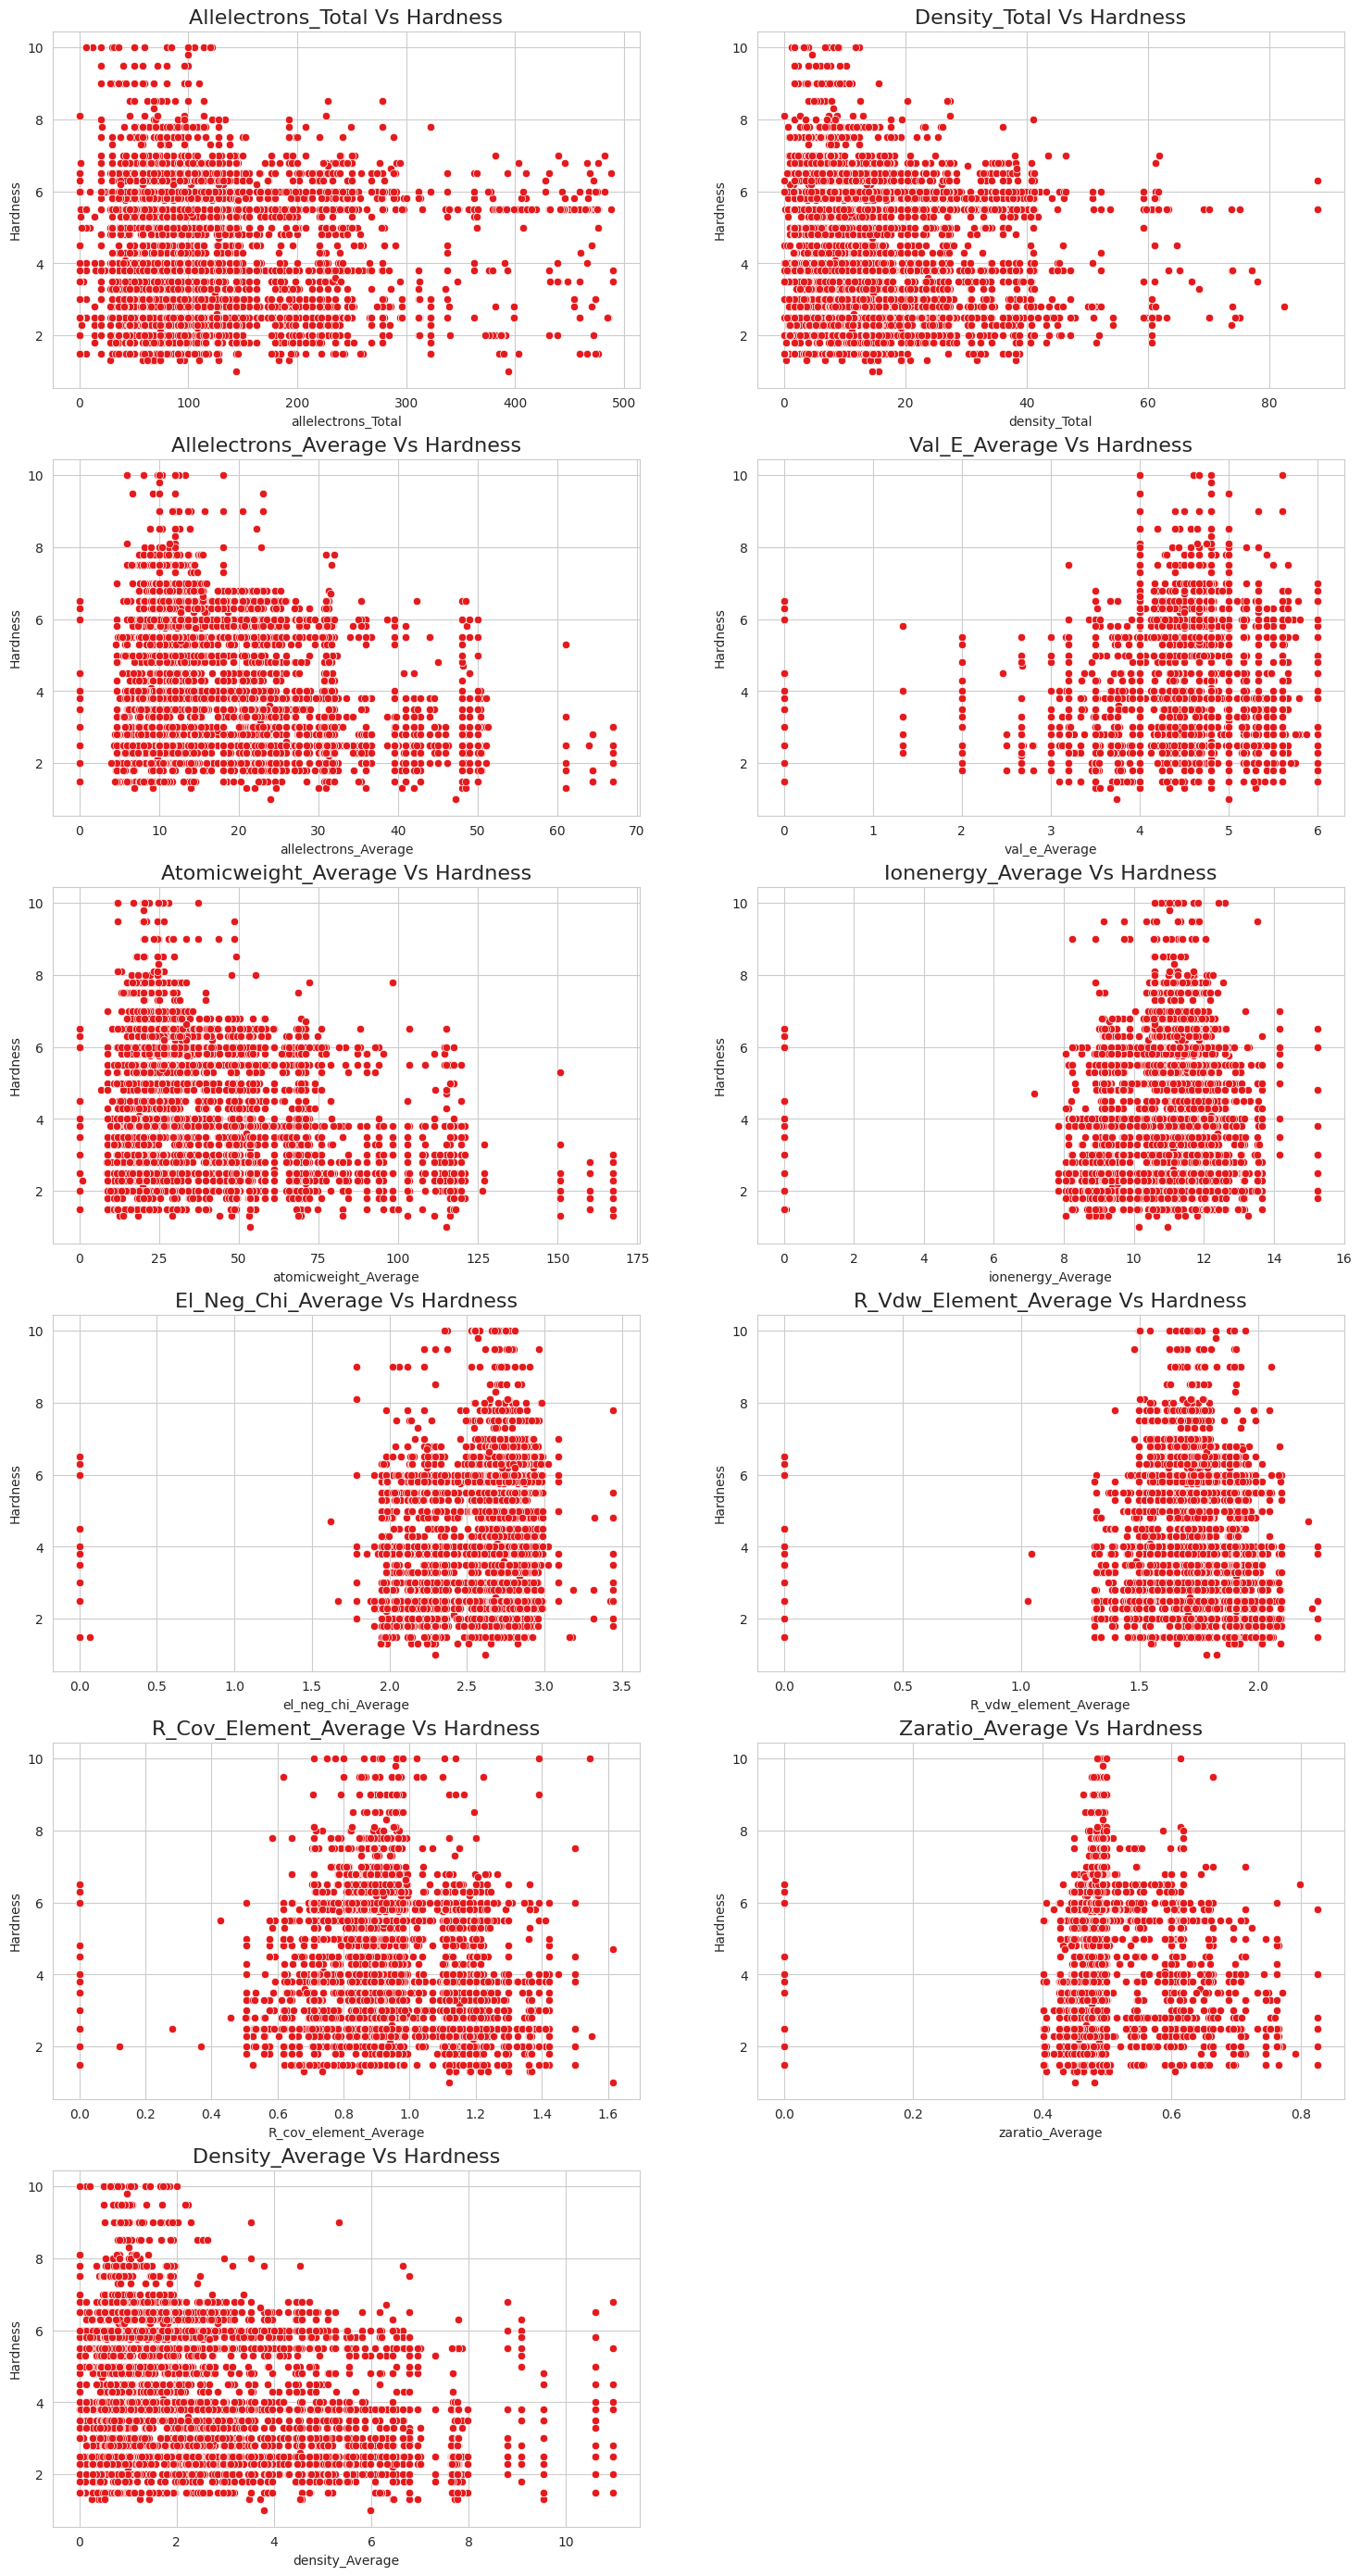

In [21]:
# visualization

plt.figure(figsize=(18, 35))
for i, feature in enumerate(train_df.columns[:-1]):
    
    plt.subplot(6, 2, i+1)
    ax = sns.scatterplot(data=train_df, x=feature, y='Hardness')
    ax.set_title(f'{feature} vs Hardness'.title(), fontdict={'fontsize': 16})
else:
    plt.show()

----------------------------------

<a id='3'></a>
<h2 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 15px'>
    3- Modeling
    </h2>

In [22]:
df_ = train_df.copy()

In [23]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = df_.drop('Hardness', axis=1)
y = df_['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import median_absolute_error

# Set the random seed for reproducibility
seed = 42

# Create a list to store regressors
regressors = []

# Append regressors with appropriate arguments and seeds
regressors.append(RandomForestRegressor(n_estimators=100, random_state=seed))
regressors.append(GradientBoostingRegressor(n_estimators=100, random_state=seed))
regressors.append(ExtraTreesRegressor(n_estimators=100, random_state=seed))
regressors.append(CatBoostRegressor(n_estimators=150, random_state=seed, verbose=0))
regressors.append(LGBMRegressor(n_estimators=100, random_state=seed))


models = []
mae_scores = []

for regressor in regressors:
    model = regressor.fit(X_train, y_train)
    models.append(model)
    y_pred = model.predict(X_val)
    mae = median_absolute_error(y_val, y_pred)
    mae_scores.append(mae)
    print('---')

mae_scores = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Extra Trees', 'CatBoostRegressor','LGBMRegressor'],
    'MAE': mae_scores
})

mae_scores = mae_scores.sort_values(by='MAE', ascending=True)
mae_scores

---
---
---
---
---


,Model,MAE
4,LGBMRegressor,0.651937
0,Random Forest,0.664000
3,CatBoostRegressor,0.669982
2,Extra Trees,0.682000
1,Gradient Boosting,0.689972


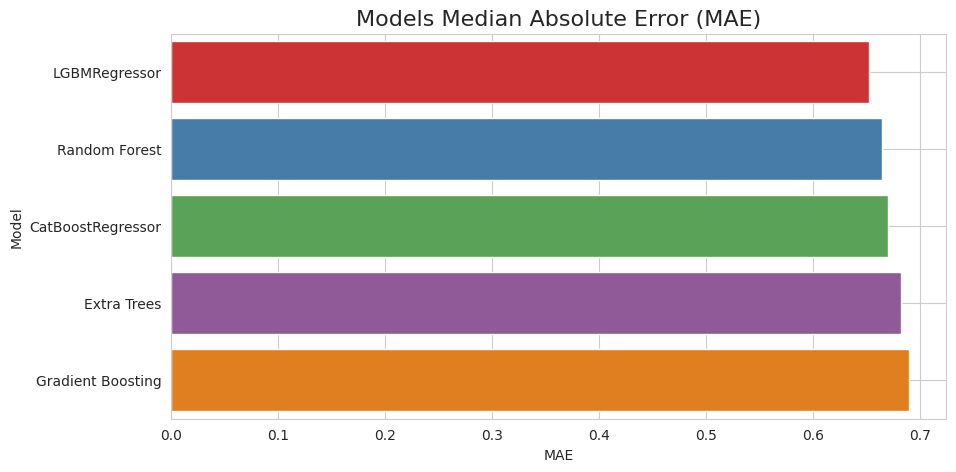

In [25]:
# Visualize the scores
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=mae_scores, x='MAE', y='Model')
ax.set_title('Models Median Absolute Error (MAE)', fontdict={'fontsize': 16})
plt.grid('True')
plt.show()

In [26]:
# Use KFold with lgbm
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import median_absolute_error

# Define the parameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',  # Use 'l1' for MAE
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42,
    'force_col_wise': True
}

# Define the number of folds for cross-validation
num_folds = 10

def kfold_lightgbm(X, y, params, num_folds):
    # Initialize an array to store the cross-validation scores
    scores = []
    models = []

    # Initialize the K-fold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create a LightGBM dataset for training and testing
        train_data = lgb.Dataset(X_train, label=y_train)
        test_data = lgb.Dataset(X_test, label=y_test)

        # Train the LightGBM model
        model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=100, verbose_eval=False)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate the MAE score for this fold
        mae = median_absolute_error(y_test, y_pred)
        
        # Append the score and model to the respective arrays
        scores.append(mae)
        models.append(model)
        
    return models, scores

# Call the kfold_lightgbm function
lgbm_models, lgbm_scores = kfold_lightgbm(X.to_numpy(), y, params, num_folds)
display(lgbm_scores)
print('Mean:', np.mean(lgbm_scores))

[0.6419305698589293,
 0.6388278801334835,
 0.5831055800872091,
 0.6590422755400587,
 0.6467830943822204,
 0.6771442720689618,
 0.6720186871891141,
 0.5984936770347078,
 0.6255002146758004,
 0.6237904383652098]

Mean: 0.6366636689335694


In [27]:
# KFold with Random Forest
# Define the number of folds for cross-validation
num_folds = 10

def kfold_random_forest(X, y, num_folds):
    # Initialize an array to store the cross-validation scores
    scores = []
    models = []

    # Initialize the K-fold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create a Random Forest regressor
        model = RandomForestRegressor(n_estimators=100, random_state=42)

        # Train the Random Forest model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the MAE score for this fold
        mae = median_absolute_error(y_test, y_pred)

        # Append the score and model to the respective arrays
        scores.append(mae)
        models.append(model)
        print('-', end=' ')
    return models, scores

# Call the kfold_random_forest function
rf_models, rf_scores = kfold_random_forest(X.to_numpy(), y, num_folds)
print('\nMean:', np.mean(rf_scores))
rf_scores

- - - - - - - - - - 
Mean: 0.6533000000000002


[0.659000000000002,
 0.6839999999999984,
 0.5980000000000012,
 0.6969999999999983,
 0.6770000000000036,
 0.6659999999999977,
 0.6700000000000013,
 0.6035000000000017,
 0.6384999999999974,
 0.6400000000000015]

In [28]:
# KFold with XGBoost
import xgboost as xgb

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'seed': 42
}

# Define the number of folds for cross-validation
num_folds = 10

def kfold_xgboost(X, y, params, num_folds):
    # Initialize an array to store the cross-validation scores
    scores = []
    models = []

    # Initialize the K-fold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create a DMatrix for XGBoost
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)

        # Train the XGBoost model
        model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtest, 'eval')], early_stopping_rounds=100, verbose_eval=False)

        # Make predictions on the test set
        y_pred = model.predict(dtest)

        # Calculate the MAE score for this fold
        mae = median_absolute_error(y_test, y_pred)

        # Append the score and model to the respective arrays
        scores.append(mae)
        models.append(model)
        print('-', end=' ')

    return models, scores

# Call the kfold_xgboost function
xgb_models, xgb_scores = kfold_xgboost(X.to_numpy(), y, params, num_folds)
print('\nMean:', np.mean(xgb_scores))
xgb_scores

- - - - - - - - - - 
Mean: 0.6333554100990295


[0.6370703697204592,
 0.6467537879943848,
 0.5879979133605957,
 0.639235258102417,
 0.6512310981750487,
 0.6419760704040529,
 0.6988034248352051,
 0.5928058624267578,
 0.6090368032455444,
 0.6286435127258301]

In [29]:
# KFold with Catboost
import catboost as cb

# Define the parameters for CatBoost
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'RMSE',
    'random_seed': 42
}

# Define the number of folds for cross-validation
num_folds = 10

def kfold_catboost(X, y, params, num_folds):
    # Initialize an array to store the cross-validation scores
    scores = []
    models = []

    # Initialize the K-fold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create a CatBoost Pool for training and testing
        train_pool = cb.Pool(X_train, label=y_train)
        test_pool = cb.Pool(X_test, label=y_test)

        # Train the CatBoost model
        model = cb.CatBoostRegressor(**params)
        model.fit(train_pool, eval_set=test_pool, verbose=False)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the MAE score for this fold
        mae = median_absolute_error(y_test, y_pred)

        # Append the score and model to the respective arrays
        scores.append(mae)
        models.append(model)
        print('-', end=' ')
        
    return models, scores

# Call the kfold_catboost function
cb_models, cb_scores = kfold_catboost(X.to_numpy(), y, params, num_folds)
print('\nMean:', np.mean(cb_scores))
cb_scores

- - - - - - - - - - 
Mean: 0.6535126240652793


[0.639848203525311,
 0.6478835103088052,
 0.594436582798255,
 0.6804567288866614,
 0.6839810365380341,
 0.6702084980970282,
 0.7353419909234025,
 0.6172809191939863,
 0.6461830740419183,
 0.6195056963393906]

<a id='4'></a>
<h2 style='text-align: center;background: black;color: white;border-radius: 10px; padding: 10px'>
    4- Prediction and Submission
    </h2>

We are going to combine the results of the best two models from each category, e.g. two models from RandomForest models, two models from lgbm models, etc.

In [30]:
def select_best_models(models, scores, num_models=2):
    # Convert scores to a numpy array
    scores = np.array(scores)

    # Get the indices that would sort the scores array in ascending order
    sorted_indices = np.argsort(scores)

    # Select the best models based on the lowest scores
    best_models = [models[idx] for idx in sorted_indices[:num_models]]

    return best_models

In [31]:
# predict the test set

# extract the best models
lgbm_best = select_best_models(lgbm_models, lgbm_scores, 3)
rf_best = select_best_models(rf_models, rf_scores, 2)
xgb_best = select_best_models(xgb_models, xgb_scores, 2)
cb_best = select_best_models(cb_models, cb_scores, 2)

# Initialize empty arrays for predictions
predictions = []

# Loop through each set of best models and make predictions
for best_models in [lgbm_best, rf_best, xgb_best, cb_best]:
    model_predictions = np.mean([model.predict(xgb.DMatrix(test_df)) if isinstance(model, xgb.Booster) else model.predict(test_df) for model in best_models], axis=0)
    predictions.append(model_predictions)

# Average the predictions from all models
ensemble_predictions = np.mean(predictions, axis=0)

# Print the ensemble predictions
print("Ensemble Predictions:")
ensemble_predictions

Ensemble Predictions:


array([2.7928063 , 2.82740997, 5.91270134, ..., 4.86864628, 4.58663807,
       2.96435384])

In [32]:
# create the submission file
sub_file = pd.read_csv('/kaggle/input/playground-series-s3e25/sample_submission.csv')

sub_file["Hardness"] = ensemble_predictions
sub_file

,id,Hardness
0,10407,2.792806
1,10408,2.827410
2,10409,5.912701
3,10410,4.212238
4,10411,5.374812
...,...,...
6934,17341,5.801829
6935,17342,4.127799
6936,17343,4.868646
6937,17344,4.586638


In [33]:
sub_file.to_csv('./submission.csv', index=False)
print('Submitted!')

Submitted!


<h2 style='background: black;color: white;border-radius: 10px; text-align: center; padding: 80px;font-size: 32px'>
    Thank you 🙌🥰
    </h2>